In [688]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import date, timedelta

In [689]:

cabData = pd.read_csv('../DataSets/Cab_Data.csv')
cityData = pd.read_csv('../DataSets/City.csv')
customerData = pd.read_csv('../DataSets/Customer_ID.csv')
transactionData = pd.read_csv('../DataSets/Transaction_ID.csv')



# Exploring and joining data. 

In [690]:
cabData

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [691]:
cabData['Transaction ID'].drop_duplicates()

0         10000011
1         10000012
2         10000013
3         10000014
4         10000015
            ...   
359387    10440101
359388    10440104
359389    10440105
359390    10440106
359391    10440107
Name: Transaction ID, Length: 359392, dtype: int64

In [692]:
cityData

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [693]:
customerData

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [694]:
customerData['Customer ID'].drop_duplicates()

0        29290
1        27703
2        28712
3        28020
4        27182
         ...  
49166    12490
49167    14971
49168    41414
49169    41677
49170    39761
Name: Customer ID, Length: 49171, dtype: int64

In [695]:
transactionData

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [696]:
transactionData['Transaction ID'].drop_duplicates()

0         10000011
1         10000012
2         10000013
3         10000014
4         10000015
            ...   
440093    10440104
440094    10440105
440095    10440106
440096    10440107
440097    10440108
Name: Transaction ID, Length: 440098, dtype: int64

In [697]:
cab_transactionData = cabData.merge(right=transactionData, how='outer', on='Transaction ID').sort_values(by='Transaction ID')

In [698]:
cab_transactionData

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359388,10440104,43104.0,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,43105.0,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,43105.0,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card
359391,10440107,43102.0,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,52917,Card


In [699]:
cab_trans_city = cab_transactionData.merge(right=cityData, how="left", on='City')

In [700]:
cab_trans_city

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Population,Users
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,"814,885","24,701"
1,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,"814,885","24,701"
2,10000013,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,"814,885","24,701"
3,10000014,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,"814,885","24,701"
4,10000015,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...
440093,10440104,43104.0,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,"418,859","127,001"
440094,10440105,43105.0,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,"418,859","127,001"
440095,10440106,43105.0,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,"418,859","127,001"
440096,10440107,43102.0,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,52917,Card,"418,859","127,001"


In [701]:
df = cab_trans_city.merge(right=customerData, how='left', on='Customer ID')

In [702]:
profit = df['Price Charged'] - df['Cost of Trip']

In [703]:
df.insert(loc=7, column='Profit', value=profit)

In [704]:
df.pop('Users')

0           24,701 
1           24,701 
2           24,701 
3           24,701 
4           24,701 
            ...    
440093     127,001 
440094     127,001 
440095     127,001 
440096     127,001 
440097          NaN
Name: Users, Length: 440098, dtype: object

In [705]:
df.dropna(inplace=True)

In [706]:
df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Population,Gender,Age,Income (USD/Month)
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,"814,885",Male,28,10813
1,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,"814,885",Male,27,9237
2,10000013,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,28712,Cash,"814,885",Male,53,11242
3,10000014,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,28020,Cash,"814,885",Male,23,23327
4,10000015,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,27182,Card,"814,885",Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440090,10440101,43108.0,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,52392,Cash,"418,859",Male,24,15651
440093,10440104,43104.0,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,53286,Cash,"418,859",Male,32,6528
440094,10440105,43105.0,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,52265,Cash,"418,859",Male,56,7966
440095,10440106,43105.0,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,52175,Card,"418,859",Male,32,6423


# Adding useful columns begins here. 

In [707]:
def toDate(days):
    start = date(1900,1,1) 
    delta = timedelta(days)
    return start + delta

In [708]:
df['DateTime'] = df['Date of Travel'].apply(lambda x: toDate(x))

In [709]:

def getQuarter(date: date):
    return (date.month - 1) // 3 + 1


In [710]:
def getNumQuarter(quarter: str):
    x = quarter.split(sep='-')
    yr, q = int(x[0]), int(x[1])
    return yr + q / 10 

In [711]:
df['Year'] = df['DateTime'].apply(lambda x: x.year)
df['Quarter'] = df['DateTime'].apply(lambda x: getQuarter(x))
df['String Quarter'] = df['Year'].astype(str).str.cat(df['Quarter'].astype(str), sep='-')
df['Numeric Quarter'] = df['String Quarter'].apply(lambda x: getNumQuarter(x))

In [712]:
df.drop(columns=['Population'], inplace=True)


In [713]:
df.drop(df.loc[df['Year'] == 2019].index, inplace=True)

In [714]:
def getAgeGroup(age):
    if 0 <= age < 18:
        return '0-17'
    elif 18 <= age < 40:
        return '18-40'
    elif 40 <= age < 65:
        return '41-65'
    else:
        return '65+'

In [715]:
df['Age Group'] = df['Age'].apply(lambda x: getAgeGroup(x))

In [716]:
salary_groups = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000+']

In [717]:
def getSalaryGroup(salary):
    if 0 <= salary <= 5000:
        return '0-5000'
    elif 5000 < salary <= 10000:
        return '5000-10000'
    elif 10000 < salary <= 15000:
        return '10000-15000'
    elif 15000 < salary <= 20000:
        return '15000-20000'
    elif 20000 < salary <= 25000:
        return '20000-25000'
    else:
        return '25000+'


In [718]:
df['Salary Group'] = df['Income (USD/Month)'].apply(lambda x: getSalaryGroup(x))

In [719]:

df[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'Age', 'Income (USD/Month)', 'Year']].describe()

,KM Travelled,Price Charged,Cost of Trip,Profit,Age,Income (USD/Month),Year
count,358879.000000,358879.000000,358879.000000,358879.000000,358879.000000,358879.000000,358879.000000
mean,22.567062,423.507425,286.185719,137.321706,35.336317,15049.208962,2017.049844
std,12.233036,274.438096,157.986311,160.367614,12.594290,7969.706257,0.799638
min,1.900000,15.600000,19.000000,-220.060000,18.000000,2000.000000,2016.000000
25%,12.000000,206.465000,151.200000,28.026000,25.000000,8424.000000,2016.000000
50%,22.440000,386.400000,282.480000,82.004800,33.000000,14685.000000,2017.000000
75%,32.960000,583.755000,413.683200,190.166000,42.000000,21035.000000,2018.000000
max,48.000000,2048.030000,691.200000,1463.966000,65.000000,35000.000000,2018.000000


In [720]:
pink = df.loc[df['Company'] == "Pink Cab"]

In [721]:
yellow = df.loc[df['Company'] == "Yellow Cab"]

In [722]:
pink[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'Age', 'Income (USD/Month)']].describe()

,KM Travelled,Price Charged,Cost of Trip,Profit,Age,Income (USD/Month)
count,84597.000000,84597.000000,84597.000000,84597.000000,84597.000000,84597.000000
mean,22.559057,310.773855,248.137294,62.636561,35.322671,15058.557549
std,12.230286,181.977757,135.392272,77.607163,12.644662,7990.790555
min,1.900000,15.600000,19.000000,-220.060000,18.000000,2000.000000
25%,12.000000,159.960000,131.868000,11.190000,25.000000,8371.000000
50%,22.440000,298.050000,246.330000,41.480000,33.000000,14711.000000
75%,32.960000,441.410000,360.180000,93.940000,42.000000,21055.000000
max,48.000000,1623.480000,576.000000,1119.480000,65.000000,35000.000000


In [723]:
yellow[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'Age', 'Income (USD/Month)']].describe()

,KM Travelled,Price Charged,Cost of Trip,Profit,Age,Income (USD/Month)
count,274282.000000,274282.000000,274282.000000,274282.000000,274282.000000,274282.000000
mean,22.569531,458.277923,297.921022,160.356901,35.340525,15046.325570
std,12.233906,288.450200,162.542258,171.875866,12.578734,7963.204326
min,1.900000,20.730000,22.800000,-176.930800,18.000000,2000.000000
25%,11.990000,226.690000,158.400000,37.228200,25.000000,8439.000000
50%,22.440000,425.170000,295.596000,102.107800,33.000000,14679.000000
75%,32.960000,634.010000,432.432000,228.837300,42.000000,21026.000000
max,48.000000,2048.030000,691.200000,1463.966000,65.000000,34996.000000


# Plotting 

In [724]:
bins = range(-200, 1000, 50)

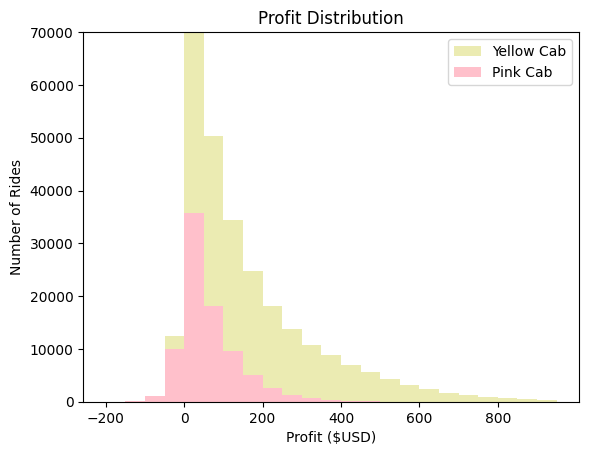

In [725]:
plt.xticks(bins[::4])
plt.hist(yellow['Profit'], bins=bins, color='y',  alpha=0.3, label='Yellow Cab')
plt.hist(pink['Profit'], bins=bins, color='pink', label='Pink Cab')
plt.ylim(0, 70000)

plt.title('Profit Distribution')
plt.xlabel('Profit ($USD)')
plt.ylabel('Number of Rides')
plt.legend()
plt.show()


# Research Questions 

> Per city, how many transactions has each company made? 

> Per fiscal quarter, how many transactions has each company made? 
    
 * By gender, age, salary

> What is the total profit for each company per fiscal quarter? 

> What is the total profit for each company per year? 

> What are the profit margins compared to user salary? 
* If an observable trend exists, use $cov(X, Y) = \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])]$ where $X$ is a random variable giving salary, $Y$ is a random variable giving profit. 

> How many users continually use each company? (User retention)

* By gender, age, salary

> What is the mean profit per kilometer for each company by fiscal quarter? 

> What are the projected profits in the upcoming fiscal quarters by location?

 * Use a linear regression
 * Implement a web-app predicting profit for each company by location and fiscal quarter.  

> 1. Per city, how many transactions has each company made? 

In [726]:
P_CountByCity = pink[['City', 'Transaction ID']].groupby(['City'], as_index=False).count()
Y_CountByCity = yellow[['City', 'Transaction ID']].groupby(['City'], as_index=False).count()

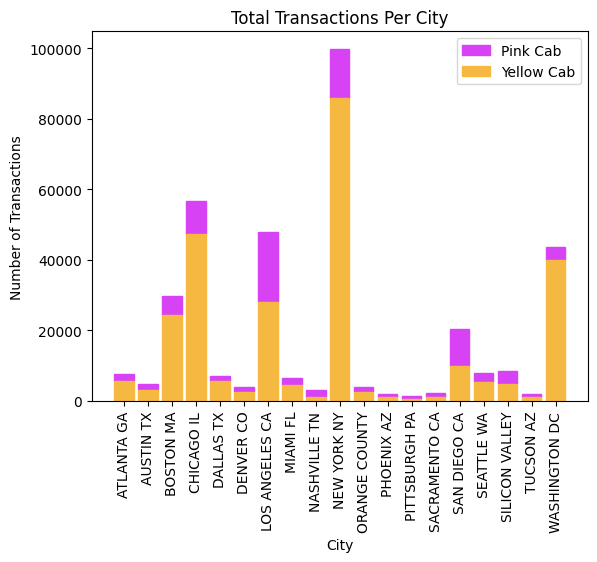

In [727]:

p = plt.bar(P_CountByCity['City'], P_CountByCity['Transaction ID'], bottom=Y_CountByCity['Transaction ID'])
y = plt.bar(Y_CountByCity['City'], Y_CountByCity['Transaction ID'] )
plt.xticks(rotation=90)
p.set_label('Pink Cab')
y.set_label('Yellow Cab')
for bar in p:
    bar.set_color('#d742f5')

for bar in y:
    bar.set_color('#f5b942')

plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.title('Total Transactions Per City')
plt.legend()
plt.show()


>> Conclusion: The yellow cab has an appreciably greater number of transactions in each city with the exception of LA, Nashville, Sacramento, and San Diego, where the pink cab performs equally well. 

> 2. Per fiscal quarter, how many transactions has each company made? 
    
 * By gender

In [728]:
def getTransactionsPerQuarter(d, quarter, feature):
    return d.groupby([quarter, feature], as_index=False).count()[[quarter, feature, 'Transaction ID']]

In [729]:
Y_CountByQG, P_CountByQG = getTransactionsPerQuarter(yellow, 'String Quarter', 'Gender'), getTransactionsPerQuarter(pink, 'String Quarter', 'Gender')

In [730]:
pmd = P_CountByQG.loc[P_CountByQG['Gender'] == 'Male']
pfd = P_CountByQG.loc[P_CountByQG['Gender'] == 'Female']
ymd = Y_CountByQG.loc[Y_CountByQG['Gender'] == 'Male']
yfd = Y_CountByQG.loc[Y_CountByQG['Gender'] == 'Female']

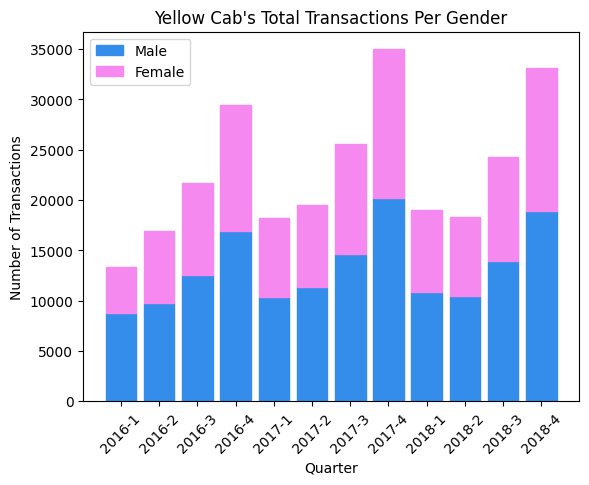

In [731]:
ym = plt.bar(ymd['String Quarter'], ymd['Transaction ID'])
yf = plt.bar(yfd['String Quarter'], yfd['Transaction ID'], bottom=ymd['Transaction ID'])

ym.set_label('Male')
yf.set_label('Female')

plt.xticks(rotation=45)

for bar in ym:
    bar.set_color('#348ceb')

for bar in yf:
    bar.set_color('#f589ef')

plt.xlabel('Quarter')
plt.ylabel('Number of Transactions')
plt.title('Yellow Cab\'s Total Transactions Per Gender')
plt.legend()
plt.show()


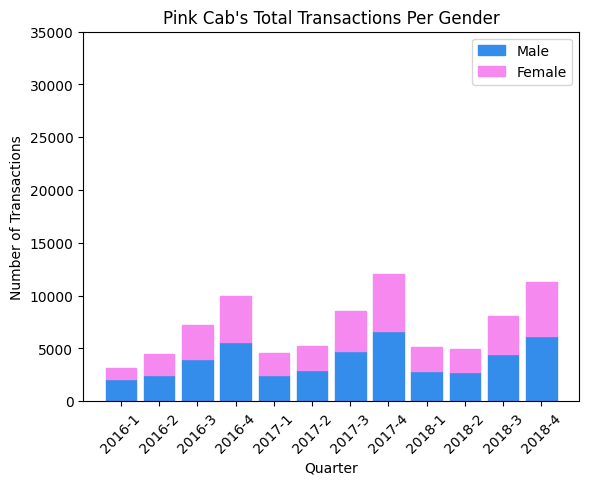

In [732]:
pm = plt.bar(pmd['String Quarter'], pmd['Transaction ID'])
pf = plt.bar(pfd['String Quarter'], pfd['Transaction ID'], bottom=pmd['Transaction ID'])
pm.set_label('Male')
pf.set_label('Female')


plt.xticks(rotation=45)

for bar in pm:
    bar.set_color('#348ceb')

for bar in pf:
    bar.set_color('#f589ef')

plt.ylim(0, 35000)
plt.xlabel('Quarter')
plt.ylabel('Number of Transactions')
plt.legend()
plt.title('Pink Cab\'s Total Transactions Per Gender')
plt.show()


* By age

In [733]:
pad, yad = getTransactionsPerQuarter(pink, 'String Quarter', 'Age Group'), getTransactionsPerQuarter(yellow, 'String Quarter', 'Age Group')

In [734]:
pdI = pad.loc[pad['Age Group'] == '18-40']
pdII = pad.loc[pad['Age Group'] == '41-65']
pdIII = pad.loc[pad['Age Group'] == '65+']

ydI = yad.loc[yad['Age Group'] == '18-40']
ydII = yad.loc[yad['Age Group'] == '41-65']
ydIII = yad.loc[yad['Age Group'] == '65+']

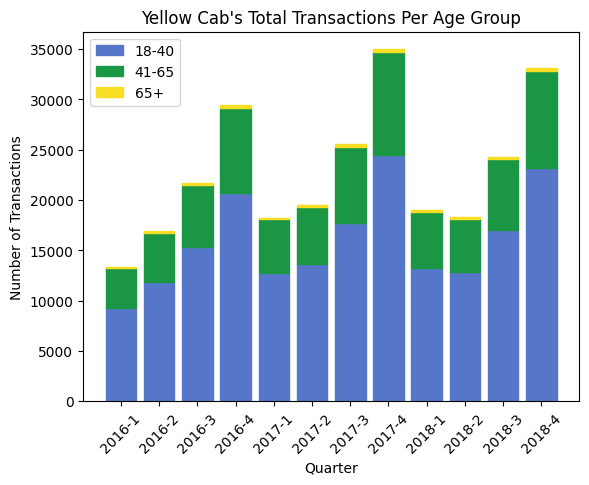

In [735]:
yI = plt.bar(ydI['String Quarter'], ydI['Transaction ID'] )
yII = plt.bar(ydII['String Quarter'], ydII['Transaction ID'], bottom= ydI['Transaction ID'] )
yIII = plt.bar(ydIII['String Quarter'], ydIII['Transaction ID'], bottom=  np.array(ydI['Transaction ID']) + np.array(ydII['Transaction ID']))

yI.set_label('18-40')
yII.set_label('41-65')
yIII.set_label('65+')
plt.xticks(rotation=45)

for bar in yI:
    bar.set_color('#5576c9')

for bar in yII:
    bar.set_color('#1a9645')

for bar in yIII:
    bar.set_color('#f7de23')

plt.xlabel('Quarter')
plt.ylabel('Number of Transactions')
plt.legend()
plt.title('Yellow Cab\'s Total Transactions Per Age Group')
plt.show()

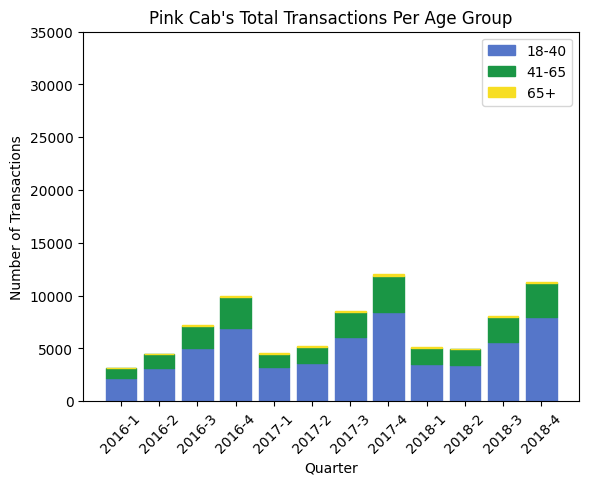

In [736]:
pI = plt.bar(pdI['String Quarter'], pdI['Transaction ID'] )
pII = plt.bar(pdII['String Quarter'], pdII['Transaction ID'], bottom= pdI['Transaction ID'] )
pIII = plt.bar(pdIII['String Quarter'], pdIII['Transaction ID'], bottom= np.array(pdI['Transaction ID']) + np.array(pdII['Transaction ID']))

pI.set_label('18-40')
pII.set_label('41-65')
pIII.set_label('65+')
plt.xticks(rotation=45)
plt.ylim(0, 35000)

for bar in pI:
    bar.set_color('#5576c9')

for bar in pII:
    bar.set_color('#1a9645')

for bar in pIII:
    bar.set_color('#f7de23')

plt.xlabel('Quarter')
plt.ylabel('Number of Transactions')
plt.legend()
plt.title('Pink Cab\'s Total Transactions Per Age Group')
plt.show()

* By salary

In [737]:
psd, ysd = getTransactionsPerQuarter(yellow, 'String Quarter', 'Salary Group'), getTransactionsPerQuarter(pink, 'String Quarter', 'Salary Group')

In [738]:
psdGroups = [psd.loc[psd['Salary Group'] == salary_group] for salary_group in salary_groups]
ysdGroups = [ysd.loc[ysd['Salary Group'] == salary_group] for salary_group in salary_groups]

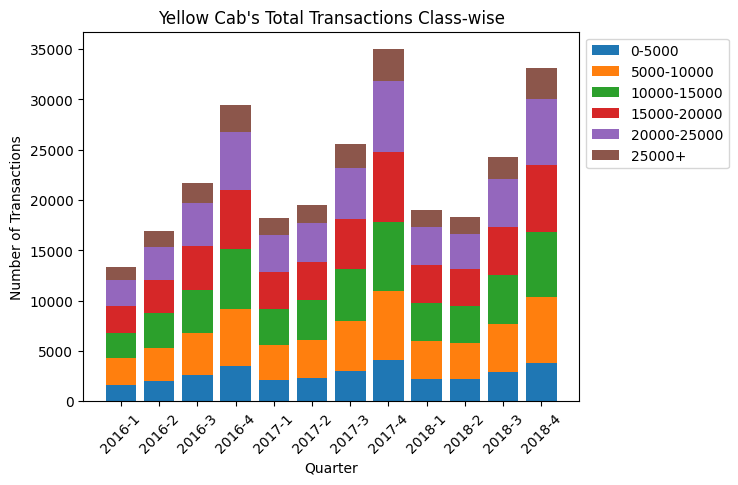

In [785]:
for i in range(len(psdGroups)):
    plt.bar(psdGroups[i]['String Quarter'], psdGroups[i]['Transaction ID'], bottom=np.sum([np.array(prev['Transaction ID']) for prev in psdGroups[:i]], axis=0)).set_label(salary_groups[i])

plt.xlabel('Quarter')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend( bbox_to_anchor=(1, 1))
plt.title('Yellow Cab\'s Total Transactions Class-wise')
plt.show()


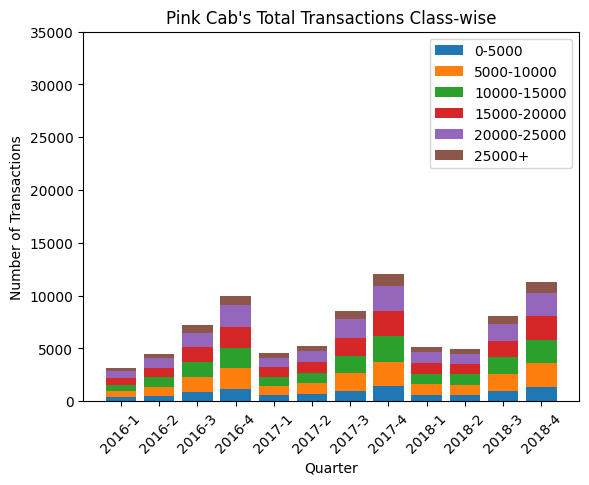

In [740]:
for i in range(len(ysdGroups)):
    plt.bar(ysdGroups[i]['String Quarter'], ysdGroups[i]['Transaction ID'], bottom=np.sum([np.array(prev['Transaction ID']) for prev in ysdGroups[:i]], axis=0)).set_label(salary_groups[i])

plt.xlabel('Quarter')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.ylim(0, 35000)
plt.legend()
plt.title('Pink Cab\'s Total Transactions Class-wise')
plt.show()

>> Conclusions
 * Transactions are roughly uniformly distributed by gender for both companies.
 * Transactions are highest in the 18-45 age group for both companies, with very few transactions from the eldest group and none in the youngest.  
 * Transacions are roughly uniformly distributed across the $5000-$25000 monthly income classes for both companies, with the other two classes being the lowest. 
 * For each company and each feature aforementioned, transactions increase generally throughout the quarters in a given year, with transactions in the 4th quarter being highest. 
 * Across each feature, and given any quarter, the yellow cab company has achieved more transactions. 

> 3. What is the total profit for each company per fiscal quarter? 

* Profit per quarter

In [741]:
def getTotalProfitPerFeature(d, feature):
    return d[[feature, 'Profit']].groupby(feature, as_index=False).sum()

In [742]:
ppd, ypd = getTotalProfitPerFeature(pink, 'String Quarter'), getTotalProfitPerFeature(yellow, 'String Quarter')

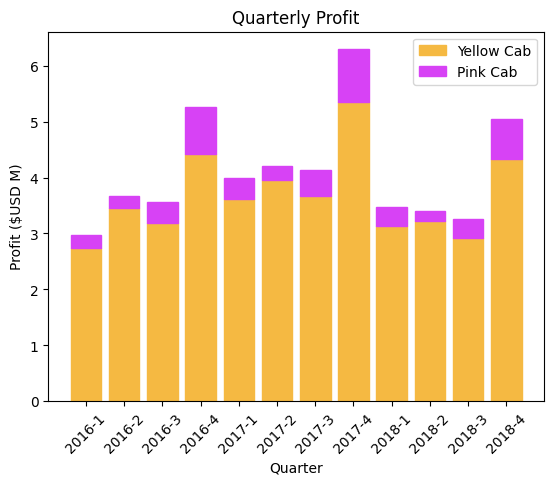

In [783]:
y = plt.bar(ypd['String Quarter'], ypd['Profit']/ 1000000)
y.set_label('Yellow Cab')
p = plt.bar(ppd['String Quarter'], ppd['Profit'] / 1000000, bottom=ypd['Profit'] / 1000000)
p.set_label('Pink Cab')
plt.xticks(rotation=45)

for bar in p:
    bar.set_color('#d742f5')

for bar in y:
    bar.set_color('#f5b942')

plt.title('Quarterly Profit')
plt.ylabel('Profit ($USD M)')
plt.xlabel('Quarter')
plt.legend()
plt.show()

* Profit per year

In [744]:
ppdy, ypdy = getTotalProfitPerFeature(pink, 'Year'), getTotalProfitPerFeature(yellow, 'Year')

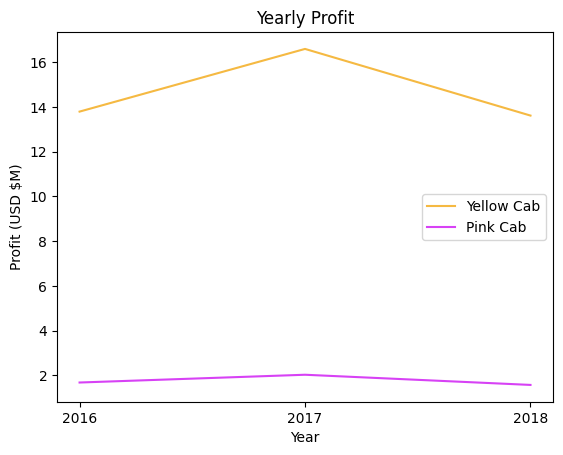

In [784]:
plt.plot(ypdy['Year'], ypdy['Profit'] / 1000000, label='Yellow Cab', color='#f5b942')
plt.plot(ppdy['Year'], ppdy['Profit'] / 1000000, label='Pink Cab', color='#d742f5')
plt.xticks(ticks=[2016, 2017, 2018])


plt.xlabel('Year')
plt.ylabel('Profit (USD $M)')

plt.legend()
plt.title('Yearly Profit')
plt.show()

In [746]:
pp, yp = pink[['Profit']].sum(), yellow[['Profit']].sum()

In [747]:
s = pp + yp

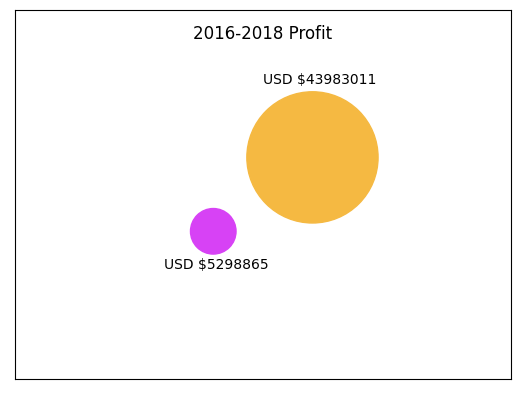

In [748]:
plt.figure(frameon=False)
plt.title('2016-2018 Profit', y=0.9)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.text(-2, -2, 'USD $' + str(int(pp)))
plt.text(0, 3, 'USD $' + str(int(yp)))
plt.xticks([])
plt.yticks([])
plt.scatter([-1, 1], [-1, 1], [10000 * pp / s, 10000 * yp / s], color=['#d742f5', '#f5b942'])
plt.show()

>> Yellow cab company achieved over 8 times a greater profit.

> 4. What are the profit margins compared to user salary? 

In [749]:
def getProfitMarginPerFeature(d, feature):
    fp = feature.copy()
    fp.append('Profit')
    fr = feature.copy()
    fr.append('Price Charged')
    p = d[fp].groupby(feature, as_index=False).sum()
    r = d[fr].groupby(feature, as_index=False).sum()
    q= pd.DataFrame()
    q[feature] = p[feature]
    q['Price Charged'] = r['Price Charged']
    q['Profit'] = p['Profit']
    q['Profit Margin'] = p['Profit'].div(r['Price Charged'])
    return q

In [750]:
ymq, pmq = getProfitMarginPerFeature(yellow, ['String Quarter']), getProfitMarginPerFeature(pink, ['String Quarter'])

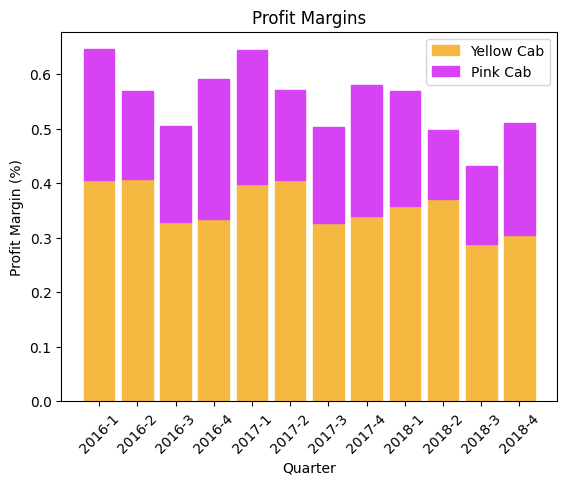

In [751]:
y = plt.bar(ymq['String Quarter'], ymq['Profit Margin'] )
y.set_label('Yellow Cab')
p = plt.bar(pmq['String Quarter'], pmq['Profit Margin'], bottom=ymq['Profit Margin'])
p.set_label('Pink Cab')
plt.xticks(rotation=45)

for bar in p:
    bar.set_color('#d742f5')

for bar in y:
    bar.set_color('#f5b942')

plt.legend()
plt.ylabel('Profit Margin (%)')
plt.xlabel('Quarter')
plt.title('Profit Margins')
plt.show()

In [752]:
yms, pms = getProfitMarginPerFeature(yellow, ['String Quarter', 'Salary Group']), getProfitMarginPerFeature(pink, ['String Quarter', 'Salary Group'])

In [753]:
pmsGroups = [pms.loc[psd['Salary Group'] == salary_group] for salary_group in salary_groups]
ymsGroups = [yms.loc[ysd['Salary Group'] == salary_group] for salary_group in salary_groups]

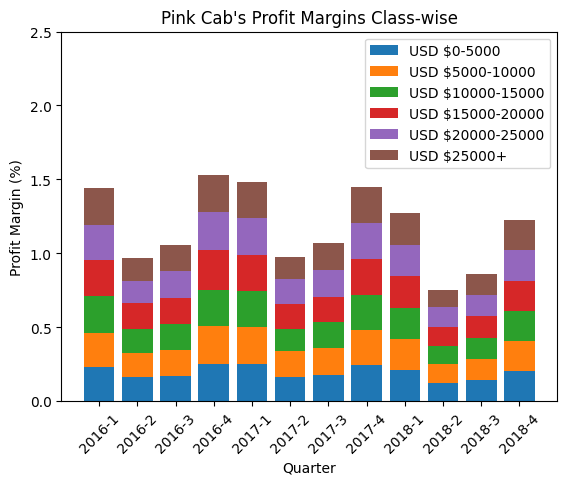

In [754]:
for i in range(len(pmsGroups)):
    plt.bar(pmsGroups[i]['String Quarter'], pmsGroups[i]['Profit Margin'], bottom=np.sum([np.array(prev['Profit Margin']) for prev in pmsGroups[:i]], axis=0)).set_label('USD $' + salary_groups[i])

plt.xlabel('Quarter')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.ylim(0, 2.5)
plt.legend( bbox_to_anchor=(1, 1))
plt.title('Pink Cab\'s Profit Margins Class-wise')
plt.show()

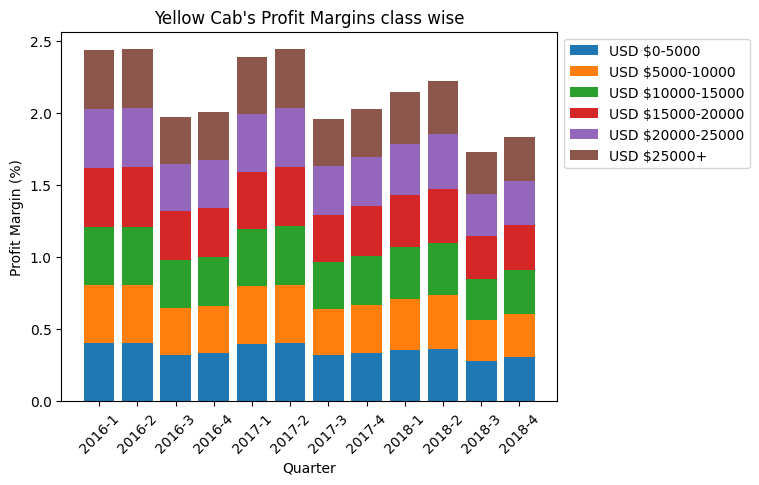

In [755]:
for i in range(len(ymsGroups)):
    plt.bar(ymsGroups[i]['String Quarter'], ymsGroups[i]['Profit Margin'], bottom=np.sum([np.array(prev['Profit Margin']) for prev in ymsGroups[:i]], axis=0)).set_label('USD $' + salary_groups[i])

plt.xlabel('Quarter')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)

plt.title('Yellow Cab\'s Profit Margins class wise')
plt.legend( bbox_to_anchor=(1, 1))
plt.show()

In [756]:
ymq, pmq = getProfitMarginPerFeature(yellow, ['City']), getProfitMarginPerFeature(pink, ['City'])

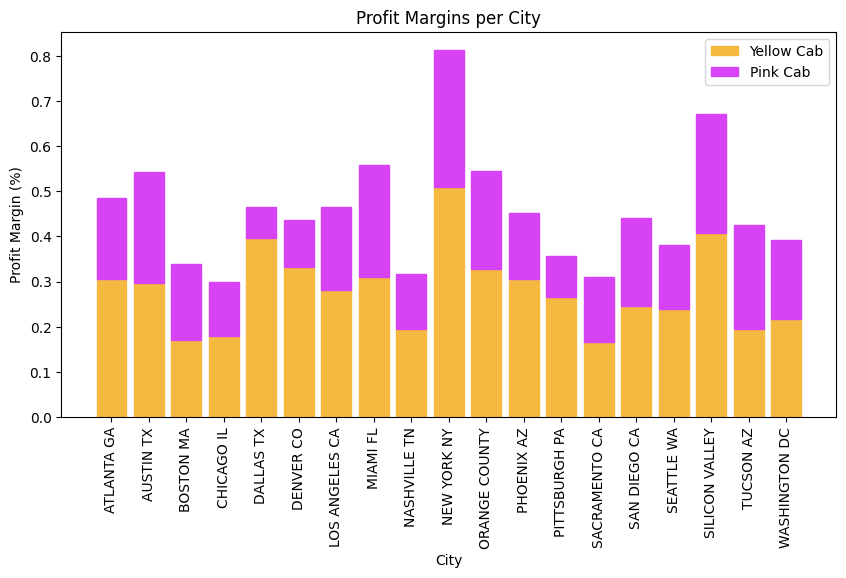

In [797]:
plt.figure(figsize=(10, 5))
yc = plt.bar(ymq['City'], ymq['Profit Margin'] )
pc = plt.bar(pmq['City'], pmq['Profit Margin'], bottom=ymq['Profit Margin'])
plt.xticks(rotation=90)

yc.set_label('Yellow Cab')
pc.set_label('Pink Cab')
for bar in pc:
    bar.set_color('#d742f5')
for bar in yc:
    bar.set_color('#f5b942')

plt.xlabel('City')
plt.ylabel('Profit Margin (%)')
plt.legend()
plt.title('Profit Margins per City')
plt.show()

>> Conclusions: Yellow cab company maintains higher profit margins, and salary is completely independent for both company's profit margins. For the pink company, the first and last quarters yield the highest margins throughout the year, for each year , and for the yellow company the first two quarters do the best. 

> 5. How many users continually use each company? (User retention)

In [758]:
yellowDups = 1 - yellow['Customer ID'].drop_duplicates().index.size / yellow.index.size
pinkDups = 1 - pink['Customer ID'].drop_duplicates().index.size / pink.index.size

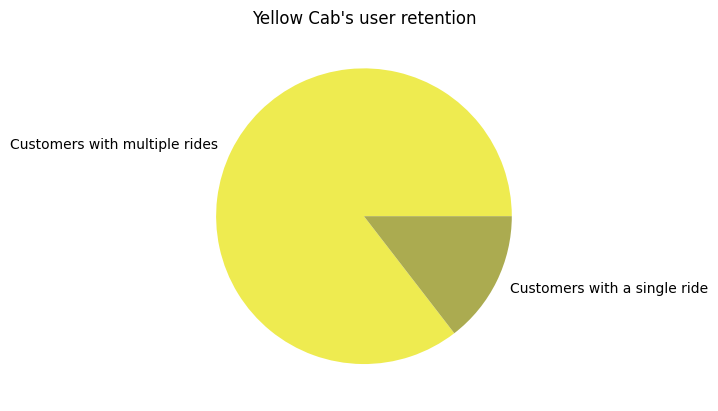

In [759]:
plt.pie([yellowDups, 1 - yellowDups], labels=['Customers with multiple rides', 'Customers with a single ride'], colors=['#eeeb50', '#abab50'])
plt.title('Yellow Cab\'s user retention')
plt.show()


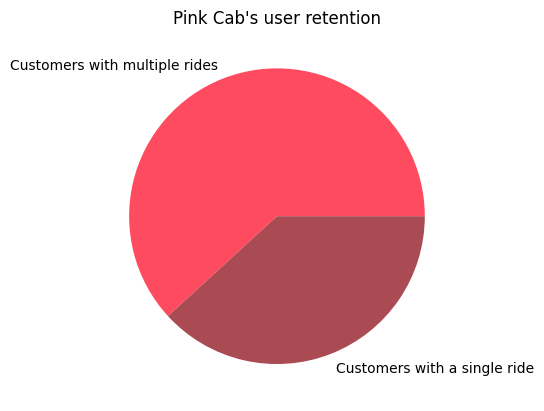

In [760]:
plt.pie([pinkDups, 1 - pinkDups], labels=['Customers with multiple rides', 'Customers with a single ride'], colors=['#ff4b60', '#aa4b54'])
plt.title('Pink Cab\'s user retention')
plt.show()

>> Conclusion: Yellow Cab's have greater user retention. 

> 6. What is the mean profit per kilometer for each company by fiscal quarter? 

In [761]:
def getProfitPerKM(d: pd.DataFrame, feature: list):
    f = ['String Quarter', 'Profit']
    f.extend(feature)
    p = d[f].groupby('String Quarter', as_index=False).sum()
    p['Profit/KM'] = p['Profit'].div(p['KM Travelled'])
    return p

In [762]:
ppkd, ypkd = getProfitPerKM(pink, ['KM Travelled']), getProfitPerKM(yellow, ['KM Travelled'])

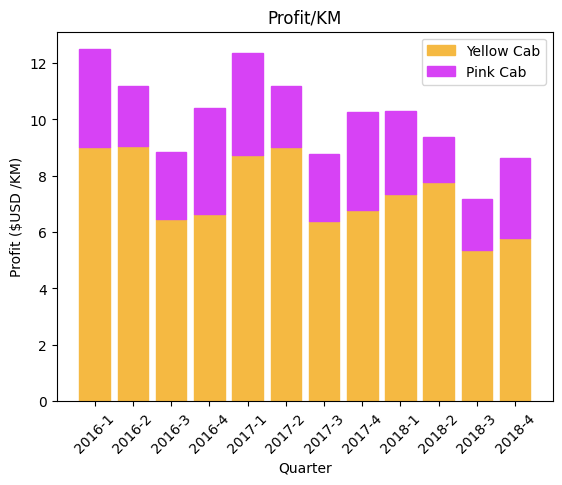

In [796]:
ypk = plt.bar(ypkd['String Quarter'], ypkd['Profit/KM'] )
ppk = plt.bar(ppkd['String Quarter'], ppkd['Profit/KM'], bottom=ypkd['Profit/KM'])
plt.xticks(rotation=45)

ypk.set_label('Yellow Cab')
ppk.set_label('Pink Cab')
for bar in ppk:
    bar.set_color('#d742f5')

for bar in ypk:
    bar.set_color('#f5b942')

plt.xlabel('Quarter')
plt.ylabel('Profit ($USD /KM)')
plt.title('Profit/KM')
plt.legend()
plt.show()

>> Conclusion: Yellow cab maintains higher profits per KM and the trend in profits/KM coincides with both company's quarterly profit margins. Both companies are experienced lower profits/KM in 2018. 

> 7. What are the cab companies' profits and total transactions on holidays?

In [765]:
holidays = pd.read_csv('../DataSets/US Holiday Dates (2004-2021).csv')

In [766]:
holidays = holidays[['Date', 'Holiday']].loc[holidays['Year'].isin([2016, 2017, 2018])].sort_values(by='Date')

In [767]:
def getHoliday(day):
    h = holidays.loc[holidays['Date'] == day.strftime('20' + '%y-%m-%d')]
    if not h.empty:
        return np.array(h)[0][1]
    return None

In [768]:
df['Holiday'] = df['DateTime'].apply(lambda x: getHoliday(x))

In [769]:
pholiday = df[['Company', 'Profit', 'Holiday']].groupby(['Company', 'Holiday'], as_index=False).sum()
tholiday = df[['Company', 'Transaction ID', 'Holiday']].groupby(['Company', 'Holiday'], as_index=False).count()
    

In [770]:
pinkholidayT, yellowholidayT, pinkholidayP, yellowholidayP = tholiday.loc[tholiday['Company'] == 'Pink Cab'], tholiday.loc[tholiday['Company'] == 'Yellow Cab'], \
pholiday.loc[pholiday['Company'] == 'Pink Cab'], pholiday.loc[pholiday['Company'] == 'Yellow Cab'], 

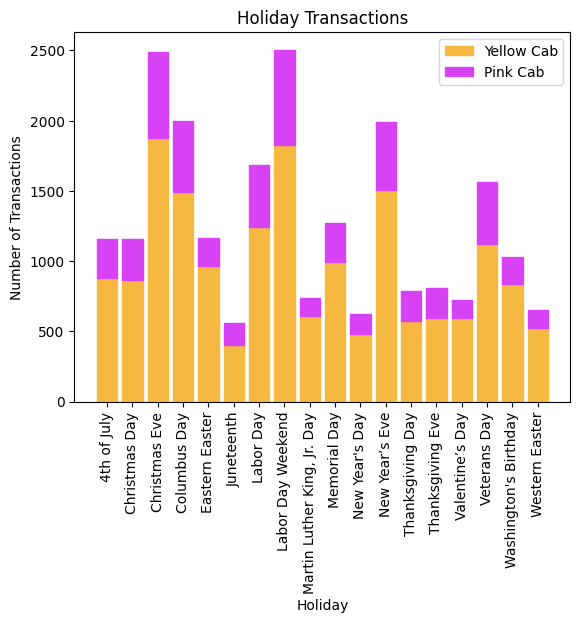

In [795]:
yh = plt.bar(yellowholidayT['Holiday'], yellowholidayT['Transaction ID'])
ph = plt.bar(pinkholidayT['Holiday'], pinkholidayT['Transaction ID'], bottom=yellowholidayT['Transaction ID'])

yh.set_label('Yellow Cab')
ph.set_label('Pink Cab')
for bar in ph:
    bar.set_color('#d742f5')

for bar in yh:
    bar.set_color('#f5b942')

plt.xticks(rotation=90)
plt.xlabel('Holiday')
plt.ylabel('Number of Transactions')
plt.legend()
plt.title('Holiday Transactions')
plt.show()

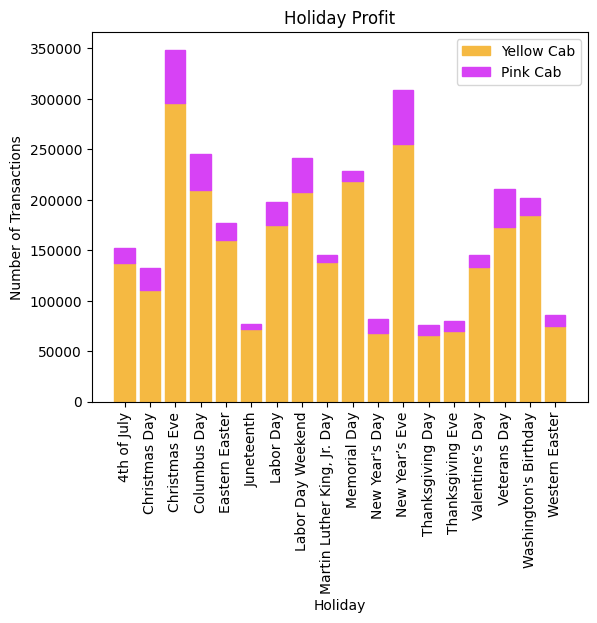

In [794]:
yhp = plt.bar(yellowholidayP['Holiday'], yellowholidayP['Profit'])
php = plt.bar(pinkholidayP['Holiday'], pinkholidayP['Profit'], bottom=yellowholidayP['Profit'])

yhp.set_label('Yellow Cab')
php.set_label('Pink Cab')
for bar in php:
    bar.set_color('#d742f5')

for bar in yhp:
    bar.set_color('#f5b942')

plt.xticks(rotation=90)
plt.xlabel('Holiday')
plt.ylabel('Number of Transactions')
plt.legend()
plt.title('Holiday Profit')
plt.show()

>> Conclusion: Yellow cab outperforms in transactions and profit on holidays. 

# Converting dataset to a readable array for linear regression

In [773]:
n = pd.DataFrame()

In [774]:
cityID =  {}
cities = df['City'].unique().tolist()
for city in cities:
    cityID[city] = cities.index(city)



quarterID = {'1': 1, '2': 2, '3': 3, '4': 4}
ageID = {'18-40': 0, '41-65': 1, '65+': 2}
genderID = {'Male': 0, 'Female': 1}
companyID = {'Yellow Cab': 0, 'Pink Cab': 1}
salaryID = {'0-5000': 0, '5000-10000': 1, '10000-15000': 2, '15000-20000': 3, '20000-25000': 4, '25000+': 5}


In [775]:
queryData = {'company': companyID, 'quarter': quarterID, 'city': cityID, 'gender': genderID, 'salary': salaryID, 'age': ageID}

In [776]:
import json
with open('queryData.json', 'w') as f:
    json.dump(queryData, f)

In [777]:


def getCompanyID(company):
    return companyID[company]

def getCityID(city):
    return cityID[city]

def getAgeGroupID(age):
    return ageID[age]

def getGenderID(gender):
    return genderID[gender]

def getSalaryGroupID(salary):
    return salaryID[salary]

    


In [778]:
n[['Date of Travel', 'Year', 'Quarter']] = df[['Date of Travel', 'Year', 'Quarter']] 
n['Company'] = df['Company'].apply(lambda x: getCompanyID(x))
n['City'] = df['City'].apply(lambda x: getCityID(x))
n['Gender'] = df['Gender'].apply(lambda x: getGenderID(x))
n['Salary Group'] = df['Salary Group'].apply(lambda x: getSalaryGroupID(x))
n['Age Group'] = df['Age Group'].apply(lambda x: getAgeGroupID(x))

In [779]:
n['Profit'] = df['Profit']

In [ ]:
pd.to_pickle(n, 'regression_dataset.pkl')

In [ ]:
import os

In [ ]:
MODEL_PATH = 'models'


In [ ]:
if not os.path.exists('models'):
    os.mkdir('models')

In [ ]:
queries = [companyID, quarterID, cityID]

In [ ]:
def directories(curr_queries, curr_path):
    if curr_queries:
        curr_query = curr_queries[0]
        for query in curr_query:
            NEW_PATH = os.path.join(curr_path, query)
            if not os.path.exists(NEW_PATH):
                os.mkdir(NEW_PATH)
            directories(curr_queries[1:], NEW_PATH)


In [786]:
def overall():
    for company in companyID:
        for quarter in quarterID:
            NEW_PATH = os.path.join('models', company, quarter, 'US')
            if not os.path.exists(NEW_PATH):
                os.mkdir(NEW_PATH)

In [ ]:
directories(queries, MODEL_PATH)

In [787]:
overall()

> 8. What are the projected profits in the upcoming fiscal quarters?

In [789]:
X = [[2016], [2017], [2018], [2019], [2020], [2021], [2022], [2023], [2024]]

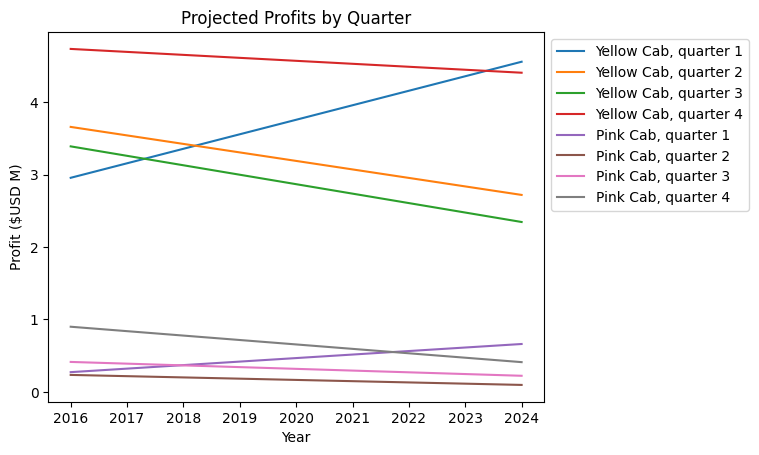

In [793]:
for company in companyID:
    for quarter in quarterID:
        with open(os.path.join('models', company, quarter, 'US', 'model.pkl'), 'rb') as f:
            model = pickle.load(f)
            y = model.predict(X)
            plt.plot(X, y / 1000000, label=f'{company}, quarter {quarter}')

plt.ylabel('Profit ($USD M)')
plt.xlabel('Year')
plt.title('Projected Profits by Quarter')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()